In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet_v2 import ResNet50V2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]
CHANNELS=3


In [3]:
train_path = '../HAM dataset/synthetic_files/train_final'
test_path = '../HAM dataset/synthetic_files/test'
val_path = '../HAM dataset/synthetic_files/val'

In [4]:
resnet = ResNet50V2(input_shape=IMAGE_SIZE + [CHANNELS], weights='imagenet', include_top=False)

In [5]:
for layer in resnet.layers:
  layer.trainable = False

In [6]:
print("hello")

hello


In [7]:
folders = glob('../HAM dataset/synthetic_files/train/*')
folders

['../HAM dataset/synthetic_files/train\\akiec',
 '../HAM dataset/synthetic_files/train\\bcc',
 '../HAM dataset/synthetic_files/train\\bkl',
 '../HAM dataset/synthetic_files/train\\df',
 '../HAM dataset/synthetic_files/train\\healthy',
 '../HAM dataset/synthetic_files/train\\mel',
 '../HAM dataset/synthetic_files/train\\nv',
 '../HAM dataset/synthetic_files/train\\vasc']

In [8]:

x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)


In [9]:
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import shutil

filenames=['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec','healthy']

for filename in filenames:

    src_dir = f'C:/Users/RAHUL NAIR/Documents/all folders/Project folder/HAM dataset/synthetic_files/train/{filename}/'

    # Set the path to the new directory where the selected images will be stored
    dst_dir = f'C:/Users/RAHUL NAIR/Documents/all folders/Project folder/HAM dataset/synthetic_files/train_final/{filename}/'
    dst_dir1 = f'C:/Users/RAHUL NAIR/Documents/all folders/Project folder/HAM dataset/synthetic_files/val/{filename}/'

    # Create the new directory if it doesn't exist
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)
    if not os.path.exists(dst_dir1):
        os.makedirs(dst_dir1)
    # Get a list of the images in the directory
    images = os.listdir(src_dir)
    len(images)
    
# Pandas dataframe
    df = pd.DataFrame({'image': images})
    train_images, test_images = train_test_split(df, test_size=0.1, random_state=42)
    for image in train_images["image"]:
        src_path = os.path.join(src_dir, image)
        dst_path = os.path.join(dst_dir, image)
        shutil.copy(src_path, dst_path)
    for image in test_images["image"]:
        src_path1 = os.path.join(src_dir, image)
        dst_path1 = os.path.join(dst_dir1, image)
        shutil.copy(src_path1, dst_path1)
# images = os.listdir(src_dir)
# print(images)
# len(images)

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
testing_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

testing_set=testing_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


# '''r=model.fit_generator(training_set,
#                          samples_per_epoch = 8000,
#                          nb_epoch = 5,
#                          validation_data = test_set,
#                          nb_val_samples = 2000)'''


Found 25169 images belonging to 8 classes.
Found 2800 images belonging to 8 classes.
Found 9327 images belonging to 8 classes.


In [14]:
class_names=training_set.class_indices
# class_names=class_names.keys()
class_names

{'akiec': 0,
 'bcc': 1,
 'bkl': 2,
 'df': 3,
 'healthy': 4,
 'mel': 5,
 'nv': 6,
 'vasc': 7}

In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\RAHUL NAIR\AppData\Local\Temp\ipykernel_818128\177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
787/787 [==============================] - 316s 387ms/step - loss: 6.7506 - accuracy: 0.5657 - val_loss: 6.8010 - val_accuracy: 0.6150
Epoch 2/10
787/787 [==============================] - 191s 242ms/step - loss: 5.9948 - accuracy: 0.6636 - val_loss: 5.9583 - val_accuracy: 0.6839
Epoch 3/10
787/787 [==============================] - 192s 243ms/step - loss: 5.5278 - accuracy: 0.7000 - val_loss: 6.3445 - val_accuracy: 0.6796
Epoch 4/10
787/787 [==============================] - 204s 259ms/step - loss: 5.0652 - accuracy: 0.7284 - val_loss: 6.4196 - val_accuracy: 0.7014
Epoch 5/10
787/787 [==============================] - 188s 239ms/step - loss: 4.9131 - accuracy: 0.7433 - val_loss: 6.4720 - val_accuracy: 0.7061
Epoch 6/10
787/787 [==============================] - 187s 237ms/step - loss: 4.9778 - accuracy: 0.7529 - val_loss: 9.1602 - val_accuracy: 0.6611
Epoch 7/10
787/787 [==============================] - 181s 230ms/step - loss: 4.7096 - accuracy: 0.7687 - val_loss: 8.6307 -

In [19]:
model.evaluate(testing_set)

292/292 [==============================] - 46s 158ms/step - loss: 8.5566 - accuracy: 0.7106


[8.556611061096191, 0.7106250524520874]

In [20]:
acc=r.history["accuracy"]
val_acc=r.history["val_accuracy"]
loss=r.history["loss"]
val_loss=r.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Loss')

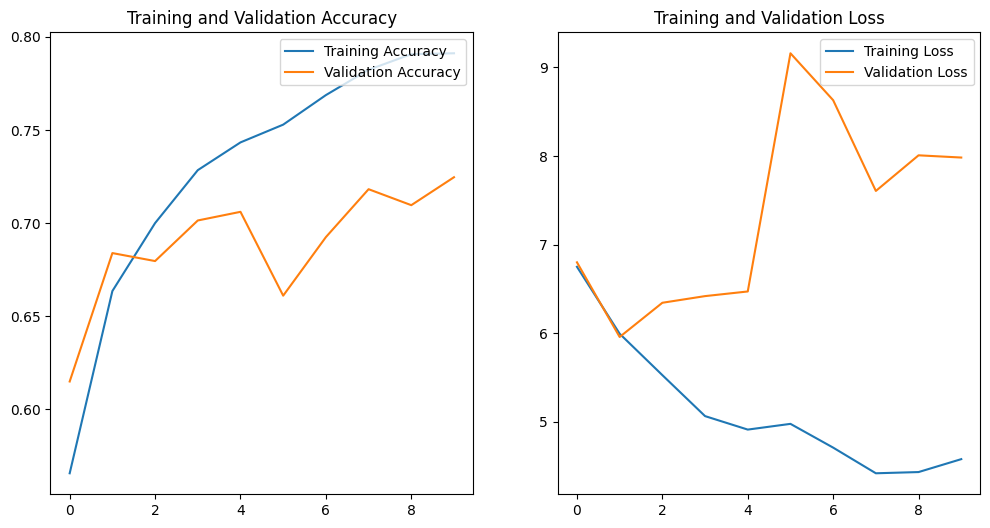

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(10),acc,label="Training Accuracy")
plt.plot(range(10),val_acc,label="Validation Accuracy")
plt.legend(loc="upper right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(10),loss,label="Training Loss")
plt.plot(range(10),val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

In [ ]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [22]:
import tensorflow as tf
from keras.models import load_model
tf.saved_model.save(model,"../models/model_v5_resnet_tf_augmented")
#model.save('../models/model_v5_resnetl.h5')

INFO:tensorflow:Assets written to: ../models/model_v5_resnet_tf_augmented\assets


INFO:tensorflow:Assets written to: ../models/model_v5_resnet_tf_augmented\assets


In [24]:
saved_model_dir="../models/model_v5_resnet_tf_augmented"
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
converter.target_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model.
with open('../models/tflite/modelResnetaugmentedV2.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import tensorflow as tf

def predict_with_tflite_model(model_path, input_data):
    input_data = np.expand_dims(input_data, axis=0)

    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    return interpreter.get_tensor(output_details[0]['index'])


In [ ]:

classes=["akiec", "bcc", "bkl", "df","healthy2", "mel", "nv", "vasc"]
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        maxPos=0
        maxConfidence=0
        
        confidence= predict_with_tflite_model("../models/tflite/model_v4_2_tf_CNN.tflite", images[i].numpy())
        actual_class = class_names[labels[i]] 
        for i in range(len(confidence[0])):
               
                if confidence[0][i]>maxConfidence:
                  
                    maxConfidence=confidence[0][i]
                    maxPos=i
        predicted_class=classes[maxPos]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence[0][maxPos]}%")
        
        plt.axis("off")